In [14]:
import pandas as pd
import plotnine as p9
import seaborn as sns

In [15]:
%matplotlib inline

In [16]:
titanic_data = pd.read_csv('../../data/titanic.csv')

We are going to look at the correlation of the gender to the death/survival of the passengers first.
To achieve this we will create a pandas DataFrame to use with plotnine which should look something like this:

| Survived | Sex    | Count |
|----------|--------|-------|
| 1        | Male   | x     |
| 0        | Male   | x     |
| 1        | Female | x     |
| 0        | Female | x     |

In [17]:
male_survived = len(titanic_data.query('Survived == 1 and Sex == "male"'))
male_dead = len(titanic_data.query('Survived == 0 and Sex == "male"'))
female_survived = len(titanic_data.query('Survived == 1 and Sex == "female"'))
female_dead = len(titanic_data.query('Survived == 0 and Sex == "female"'))
data_survived_sex = pd.DataFrame({
        'survived': [1, 0, 1, 0],
        'sex': ['male', 'male', 'female', 'female'],
        'count': [male_survived, male_dead, female_survived, female_dead]
    })

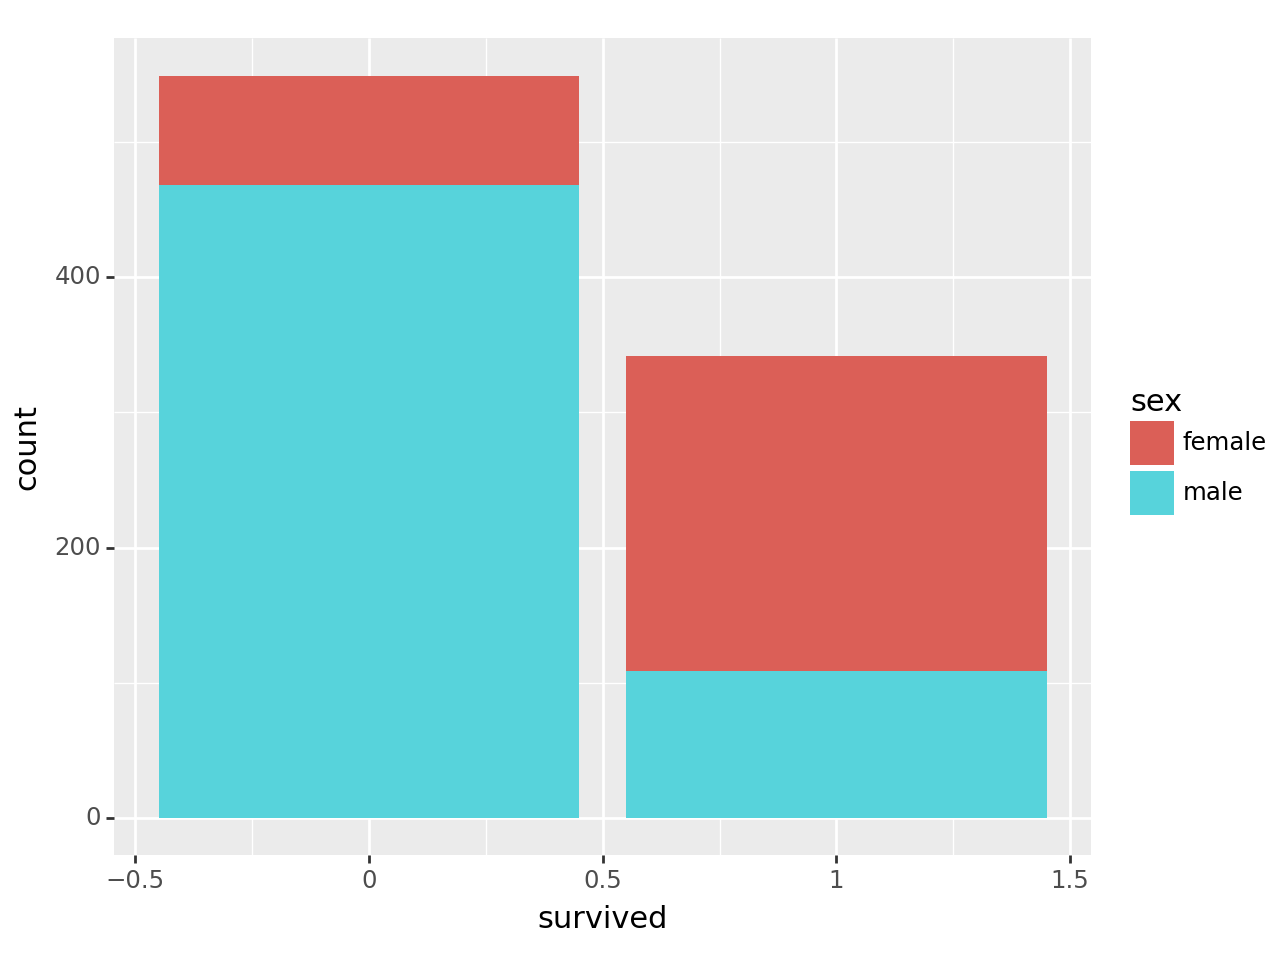

<Figure Size: (640 x 480)>

In [18]:
(
    p9.ggplot(data_survived_sex, p9.aes(x='survived', y='count', fill='sex'))
    + p9.geom_col()
)

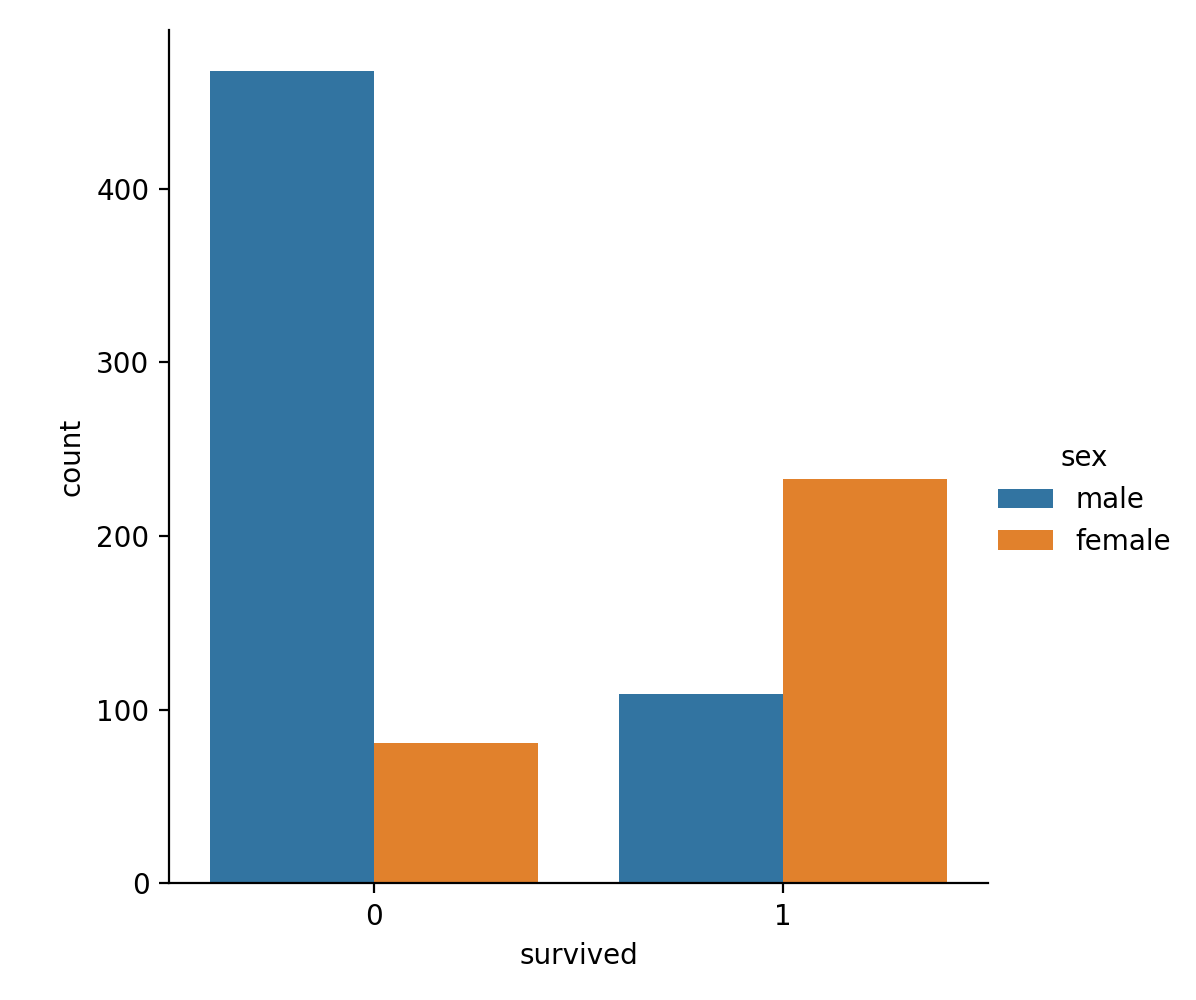

In [19]:
sns.catplot(data=data_survived_sex, kind="bar", x="survived", y="count", hue="sex")

This bar plot shows us multiple things:
- The amount of people who died is larger than the amount of survivors
- The percentage of men who survived is significantly lower than the percentage of women

Our next thing of interest is going to be the correlation of age to the survival of a passenger.
To work with the age we first have to fix a problem: very many entries for the age are NaNs.
We are going to deal with that by replacing the NaNs in the "Age" column with 100. This is not good for the training of an ML model later on but done in this case to get the NaNs into the plot.

In [20]:
titanic_data = titanic_data.fillna({"Age": 100})
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,100.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


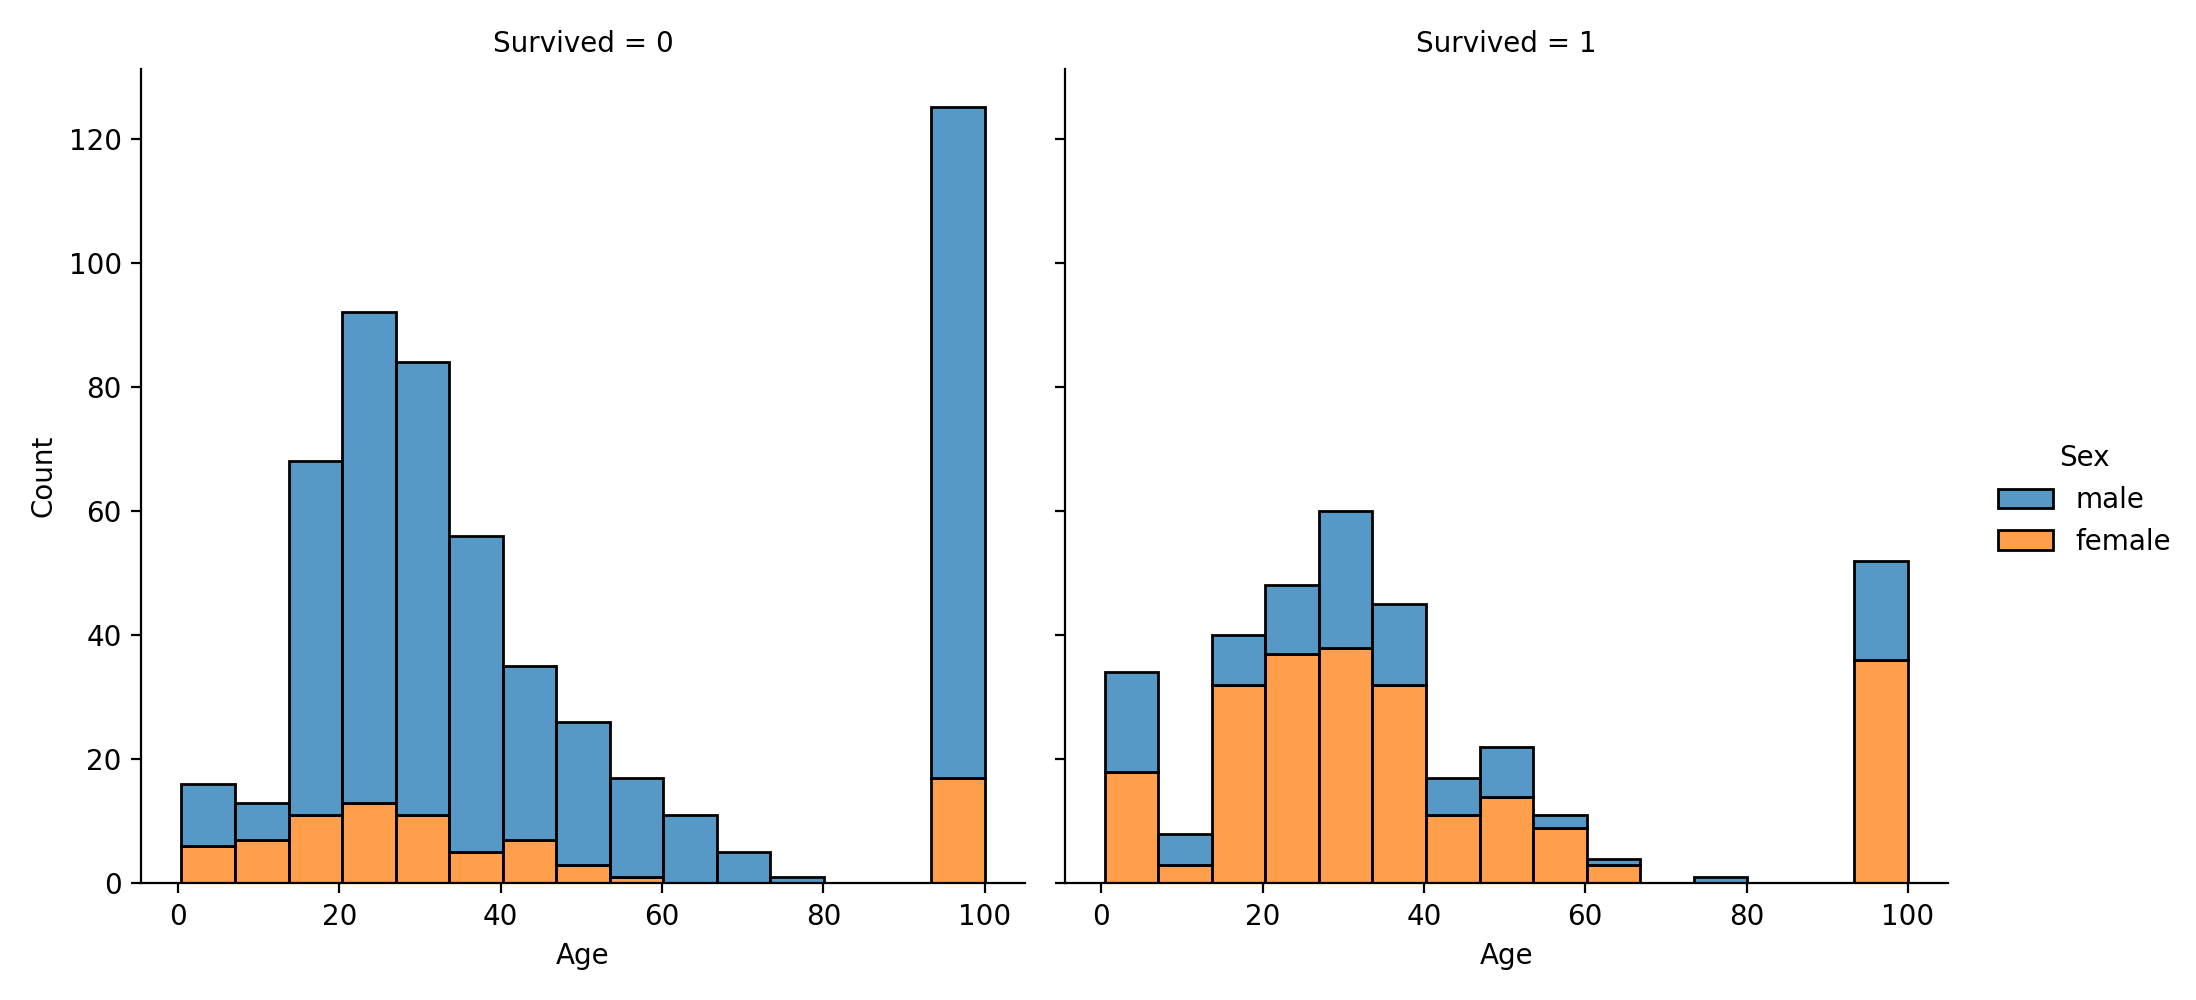

In [21]:
sns.displot(data=titanic_data, x="Age", col="Survived", hue="Sex", multiple="stack");

We now see:
- very young people have a relatively high chance of survival
- setting the NaNs to the mean age would have been a bad idea as there are very many NaNs which would create a very big spike at around 30

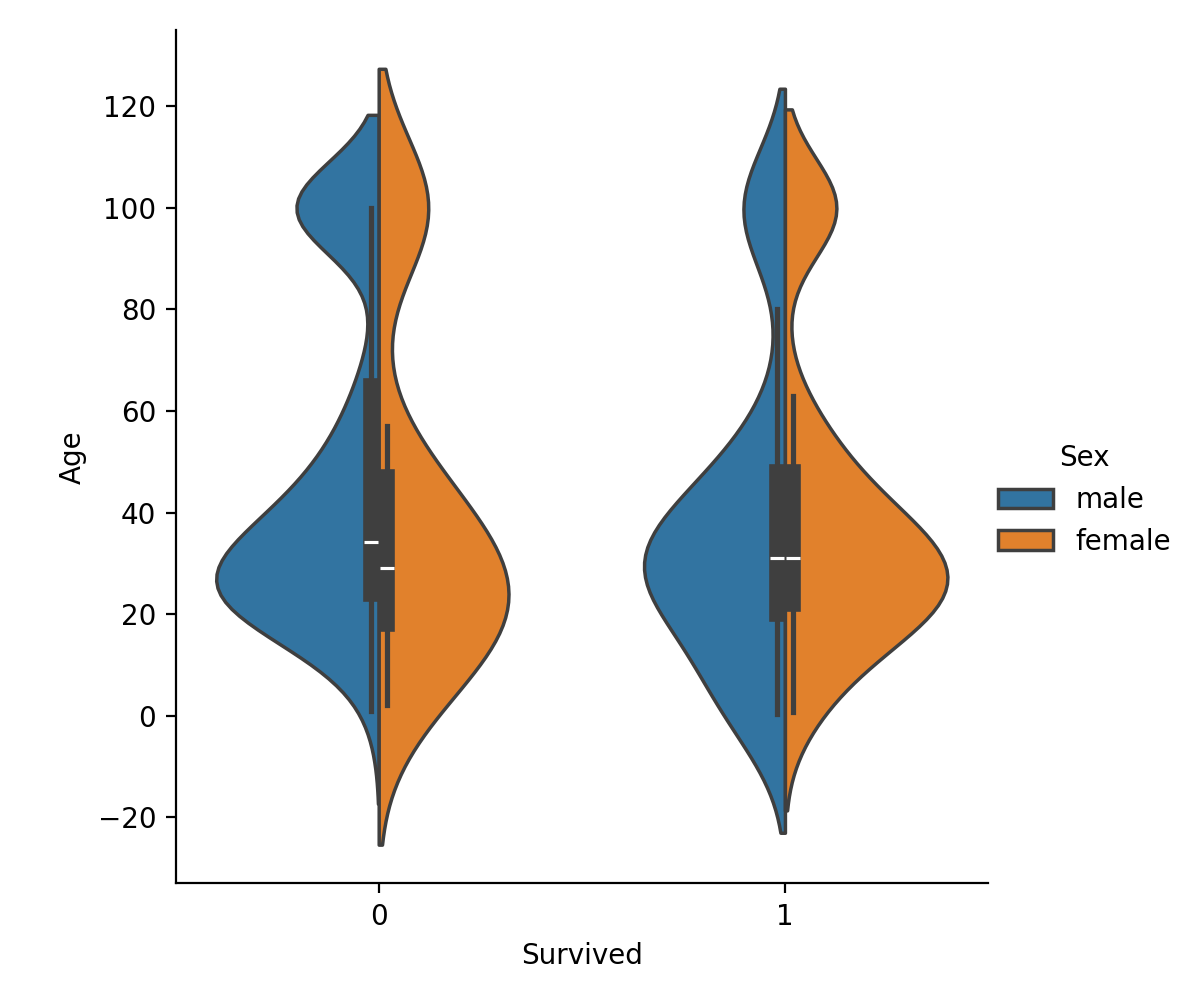

In [22]:
sns.catplot(data=titanic_data, kind="violin", x="Survived", y="Age", hue="Sex", split=True)

This violin plot shows the same as the bar plot above 

Now we are going to look at the correlation between passenger class and the survival.

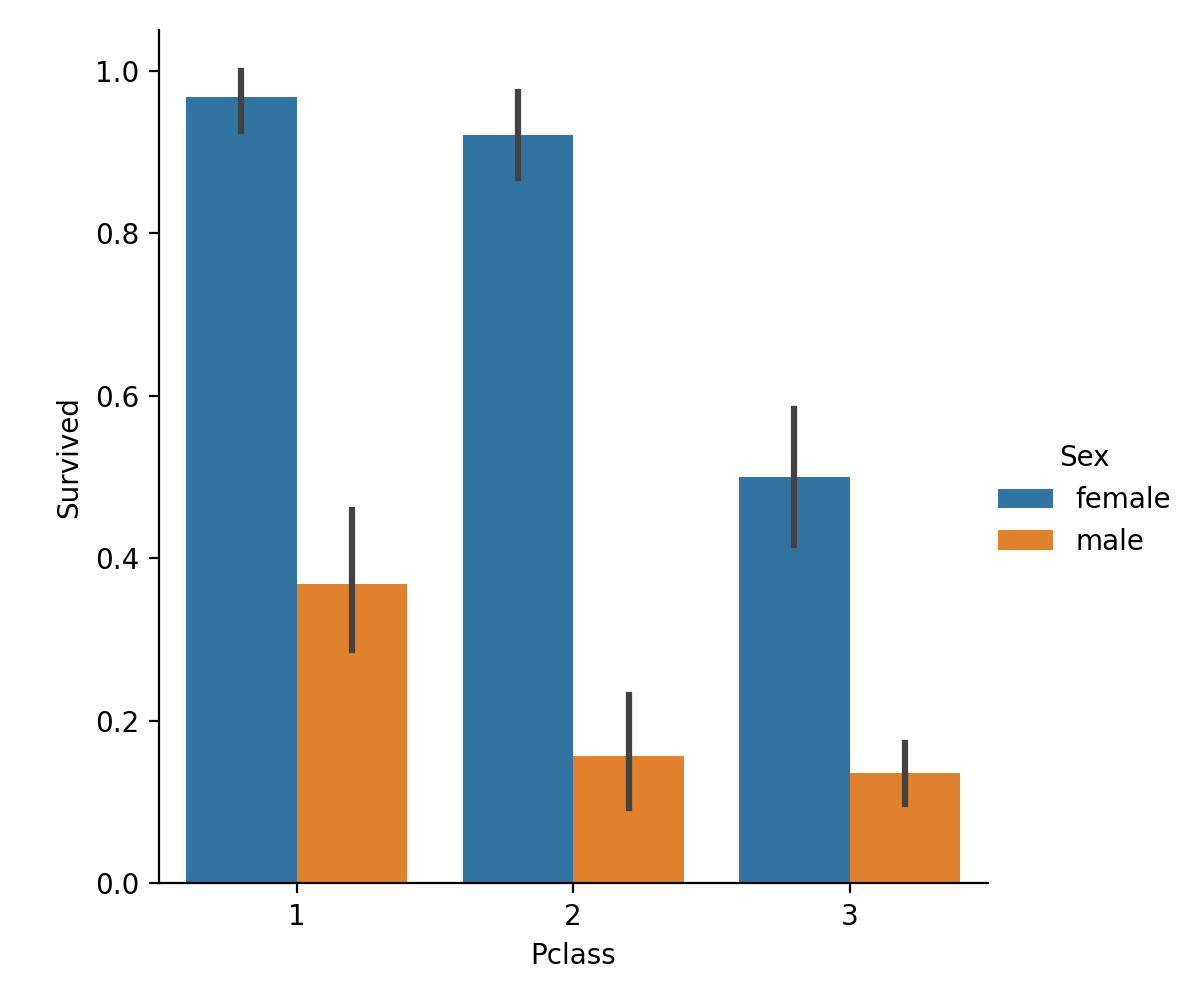

In [23]:
sns.catplot(data=titanic_data, kind="bar", x="Pclass", y="Survived", hue="Sex")

This plot shows the survival rate of the passengers in the different classes. A higher class comes with a higher chance of survival. The survival rate in females is substantially higher, as also seen in previous graphs.

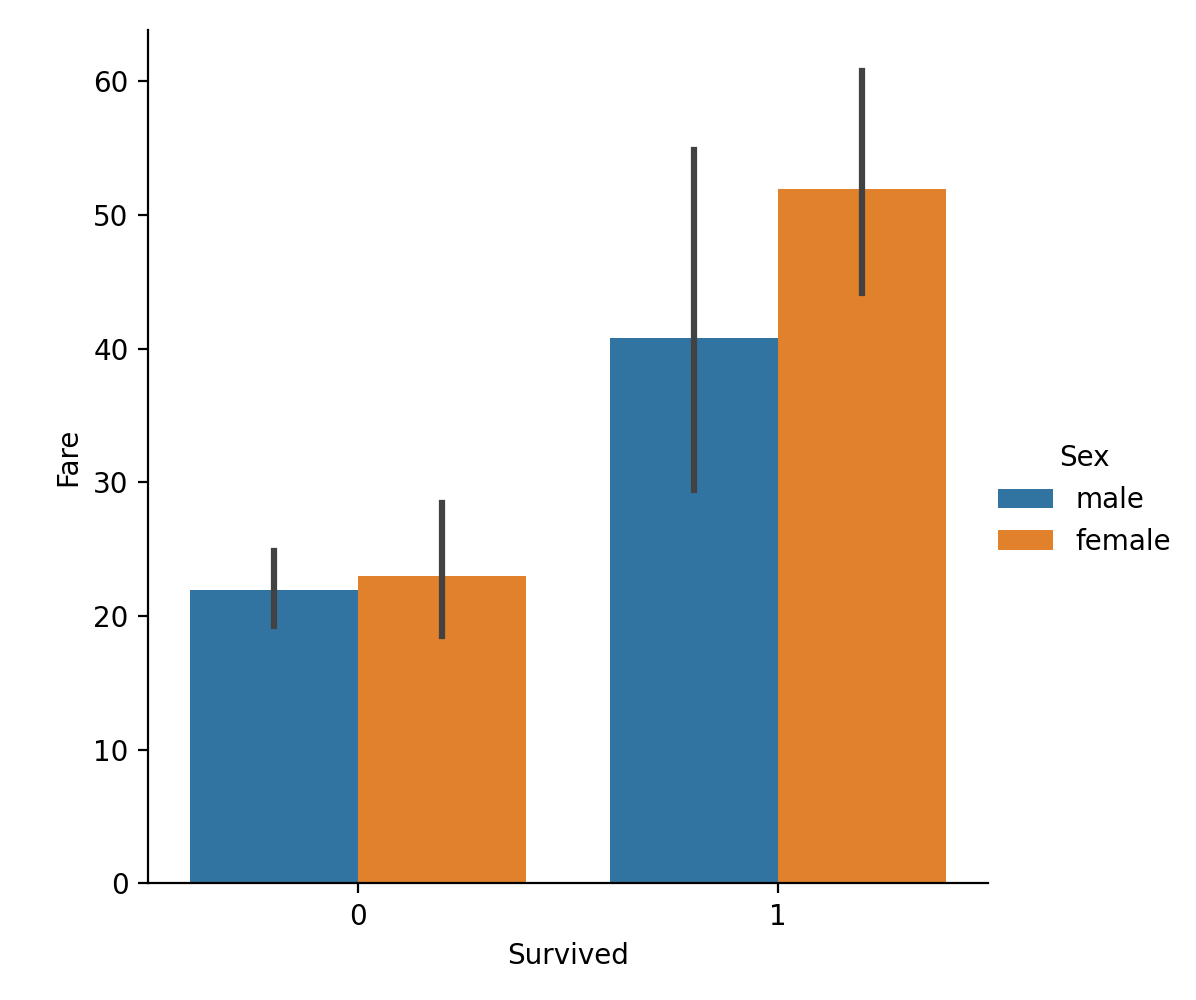

In [24]:
sns.catplot(data=titanic_data, kind="bar", x="Survived", y="Fare", hue="Sex")

In this plot you can see the average fare of the people who survived/ died. You can conclude that the survivalrate is higher if you paid more for yout ticket.

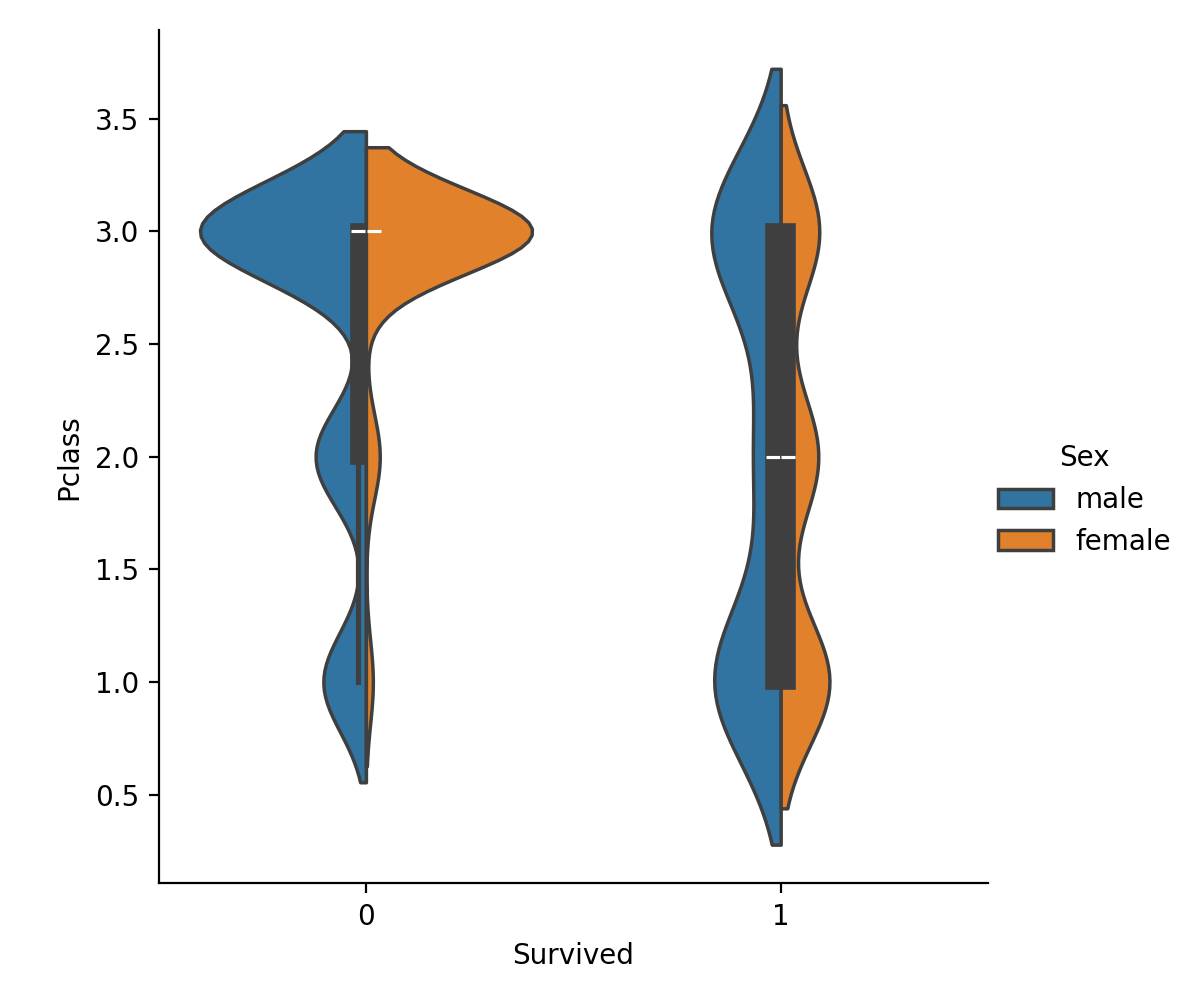

In [25]:
sns.catplot(data=titanic_data, kind="violin", x="Survived", y="Pclass", hue="Sex", split=True)